# Imports

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [50]:
def Stochastic_GD(X,Y,alpha,epochs,stopping_threshold=0.01):
  #Defines
  thetas,hypotheses,costs=[],[],[]
  theta= np.array(np.zeros((1,X.shape[1] )))


  for i in range(epochs):
      for x,y in zip(X,Y):
        thetas.append(theta.copy())
        #1. Calculate hypotheses(ypred)
        hypo = x @ theta.T
        hypotheses.append(hypo)
        #2. Calculate cost
        cost = (1/2) * np.square(hypo-y)
        costs.append(cost)
        #-- Stop !? --
        #if i>0:
          #if (abs(costs[i]-costs[i-1]) <= stopping_threshold) : break
        #3. Updata theta
        theta -= alpha* ((hypo-y) * x)

  return thetas,theta,costs,hypotheses

In [61]:
def Visual_Plotting(X,Y,thetas,costs,hypotheses,y_pred,epochs):

  plt.plot(np.array(thetas)[:,:,0],np.array(costs))
  plt.xlabel('theta0')
  plt.ylabel('cost')
  plt.show()

  plt.plot(np.array(thetas)[:,:,1],np.array(costs))
  plt.xlabel('theta1')
  plt.ylabel('cost')
  plt.show()

  plt.plot(np.array( costs),)
  plt.xlabel('epochs')
  plt.ylabel('cost')
  plt.show()

  plt.scatter(X[:,1],Y)
  [plt.plot(X[:,1]*epochs,i) for i in hypotheses]
  plt.xlabel('X')
  plt.ylabel('Fited Lines ')
  plt.show()

  plt.scatter(X[:,1],Y)
  plt.plot(X[:,1],y_pred)
  plt.xlabel('X')
  plt.ylabel('Y predict')
  plt.show()



In [62]:
def Run_Stc_GD(X,Y,alpha,epochs):
   thetas,theta,costs,hypotheses = Stochastic_GD(X,Y,alpha,epochs,stopping_threshold=1e-3)
   y_pred = X @ theta.T

   print(r2_score(Y, y_pred))
   Visual_Plotting(X,Y,thetas,costs,hypotheses,y_pred,epochs)


# Test Example

In [63]:
X_= np.array(np.random.randint(21,size=20)).reshape(20,1)
Y= (-2* X_) + 1
print(X_.shape)
print(Y.shape)

X0=np.array(np.ones( (X_.shape[0],1 )))
X= np.concatenate((X0,X_),axis=1)
print(X.shape)
print(Y.shape)


(20, 1)
(20, 1)
(20, 2)
(20, 1)


In [64]:
np.transpose([X[:,1]] * 2).compress()

TypeError: compress() missing required argument 'condition' (pos 1)

0.9979917985466976


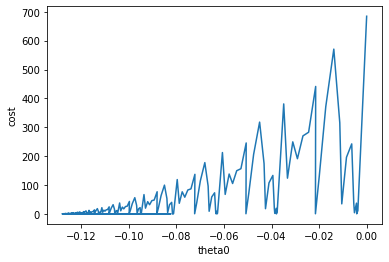

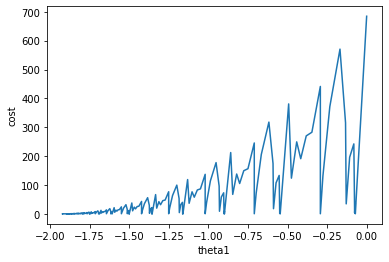

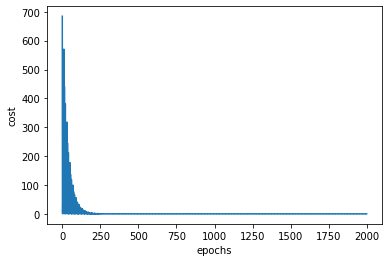

ValueError: x and y must have same first dimension, but have shapes (20,) and (1,)

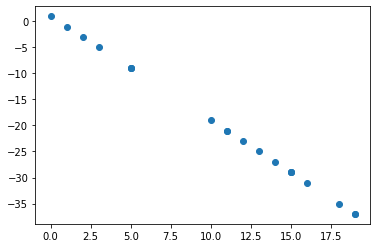

In [66]:
Run_Stc_GD(X,Y,alpha=0.0001,epochs=100)